<a href="https://colab.research.google.com/github/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/blob/main/draft-04-multitask-multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
# Loading Essential libraries
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

# Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/dataset_preprocessing.csv',) #dataset hasil preprocessing
df.head()

,username,rate,date,label,sentimen,reviews,produk,text_length,anomaly_score,lowercase_reviews,...,no_number_reviews,no_atribut_reviews,no_repetition_reviews,no_whitespace_reviews,no_banned_reviews,no_slang_reviews,clean_reviews,tokens_reviews,stopword_reviews,stem_reviews
0,nadiadiani_,3,19-03-2021 6:58,non,neutral,"Ketahuilah apa jenis kulitmu dulu,,utamakan gu...",Acnes Creamy Wash,282,1,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",...,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dahulu utamakan g...,ketahuilah apa jenis kulitmu dahulu utamakan g...,"['ketahuilah', 'apa', 'jenis', 'kulitmu', 'dah...","['ketahuilah', 'jenis', 'kulitmu', 'utamakan',...",tahu jenis kulit utama produk kandung hydratin...
1,jiminee10,3,31-08-2022 5:02,fake,neutral,Salah satu facial wash dari drugstore yang lay...,Acnes Creamy Wash,167,1,salah satu facial wash dari drugstore yang lay...,...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,"['salah', 'satu', 'facial', 'wash', 'dari', 'd...","['salah', 'facial', 'wash', 'drugstore', 'laya...",salah facial wash drugstore layak coba busa ku...
2,srihastutik1987,3,2024-05-22 22:24,fake,neutral,Efek:memberikan kulit tampak lebih cerah\n Tek...,MS GLOW FACIAL WASH,103,1,efek:memberikan kulit tampak lebih cerah\n tek...,...,efek:memberikan kulit tampak lebih cerah\n tek...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,"['efek', 'memberikan', 'kulit', 'tampak', 'leb...","['efek', 'kulit', 'cerah', 'tekstur', 'lembut'...",efek kulit cerah tekstur lembut nyaman asli ba...
3,Aisyah_18,3,01-11-2021 11:32,fake,neutral,cukup memuaskan dengan harga yang terjangkau ...,Acnes Creamy Wash,104,1,cukup memuaskan dengan harga yang terjangkau ...,...,cukup memuaskan dengan harga yang terjangkau ...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,"['cukup', 'memuaskan', 'dengan', 'harga', 'yan...","['memuaskan', 'harga', 'terjangkau', 'kualitas...",muas harga jangkau kualitas lumayan sedia mark...
4,christinjuniarti,3,29-06-2018 1:01,trusted,neutral,Dr segi packaging sih oke2 aja dan bisa liat w...,Lip Cream LA Girl,431,1,dr segi packaging sih oke2 aja dan bisa liat w...,...,dr segi packaging sih oke aja dan bisa liat w...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dari segi packaging sih oke saja dan bisa liha...,dari segi packaging sih oke saja dan bisa liha...,"['dari', 'segi', 'packaging', 'sih', 'oke', 's...","['segi', 'packaging', 'oke', 'warna', 'produk'...",segi packaging oke warna produk dalam pas dico...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   username               2400 non-null   object
 1   rate                   2400 non-null   int64 
 2   date                   2400 non-null   object
 3   label                  2400 non-null   object
 4   sentimen               2400 non-null   object
 5   reviews                2400 non-null   object
 6   produk                 2400 non-null   object
 7   text_length            2400 non-null   int64 
 8   anomaly_score          2400 non-null   int64 
 9   lowercase_reviews      2400 non-null   object
 10  no_emoji_reviews       2400 non-null   object
 11  no_hastag_reviews      2400 non-null   object
 12  no_number_reviews      2400 non-null   object
 13  no_atribut_reviews     2400 non-null   object
 14  no_repetition_reviews  2400 non-null   object
 15  no_whitespace_reviews

# Modeling

## LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, concatenate, Dropout, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.regularizers import l1, l2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
from keras.optimizers import Adam


In [ ]:
# Encode labels
label_encoder_review = LabelEncoder()
label_encoder_sentiment = LabelEncoder()
df['label_encoded'] = label_encoder_review.fit_transform(df['label'])
df['sentiment_encoded'] = label_encoder_sentiment.fit_transform(df['sentimen'])

In [ ]:
# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['stem_reviews'])
sequences = tokenizer.texts_to_sequences(df['stem_reviews'])
word_index = tokenizer.word_index

In [ ]:
# Padding sequences
max_sequence_length = 150  # Adjust as needed
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Prepare embedding matrix with Word2Vec
w2v_model = Word2Vec(sentences=[text.split() for text in df['stem_reviews']], vector_size=100, window=5, min_count=1, workers=4)
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# Split the data
X_train, X_test, y_train_label, y_test_label, y_train_sentiment, y_test_sentiment = train_test_split(
    data, df['label_encoded'], df['sentiment_encoded'], test_size=0.2, random_state=42
)

In [ ]:
# Define the model
input_ = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length, trainable=False)
embedding_layer.build((None,))  # Build the embedding layer
embedding_layer.set_weights([embedding_matrix])  # Set the weights of the embedding layer

embedding = embedding_layer(input_)
embedding = Dropout(0.5)(embedding)

In [ ]:
# Convolutional layer
conv = Conv1D(filters=64, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01))(embedding)
conv = MaxPooling1D(pool_size=2)(conv)
conv = Dropout(0.5)(conv)


In [ ]:
# # LSTM layer
lstm_out = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(embedding)
lstm_out = Dropout(0.5)(lstm_out)  # Add dropout after first LSTM
lstm_out = LSTM(64, kernel_regularizer=l2(0.01))(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)  # Add dropout after second LSTM

In [ ]:
# Bidirectional LSTM layers
lstm_out = Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))(conv)
lstm_out = Dropout(0.5)(lstm_out)  # Add dropout after first Bidirectional LSTM
lstm_out = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)  # Add dropout after second Bidirectional LSTM
lstm_out = LSTM(32, kernel_regularizer=l2(0.01))(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)  # Add dropout after third LSTM

In [ ]:
# Additional Dense and Dropout layers
dense_out = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(lstm_out)
dense_out = Dropout(0.5)(dense_out)
dense_out = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(dense_out)
dense_out = Dropout(0.5)(dense_out)
dense_out = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(dense_out)
dense_out = Dropout(0.5)(dense_out)

In [ ]:
# Output layers
output_review = Dense(3, activation='softmax', name='review_output', kernel_regularizer=l2(0.01))(dense_out)
output_sentiment = Dense(3, activation='softmax', name='sentiment_output', kernel_regularizer=l2(0.01))(dense_out)


In [ ]:
# Combine into a model
model = Model(inputs=input_, outputs=[output_review, output_sentiment])


In [ ]:
# Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 150, 100)             274100    ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 150, 100)             0         ['embedding[0][0]']           
                                                                                                  
 conv1d (Conv1D)             (None, 146, 64)              32064     ['dropout[0][0]']             
                                                                                              

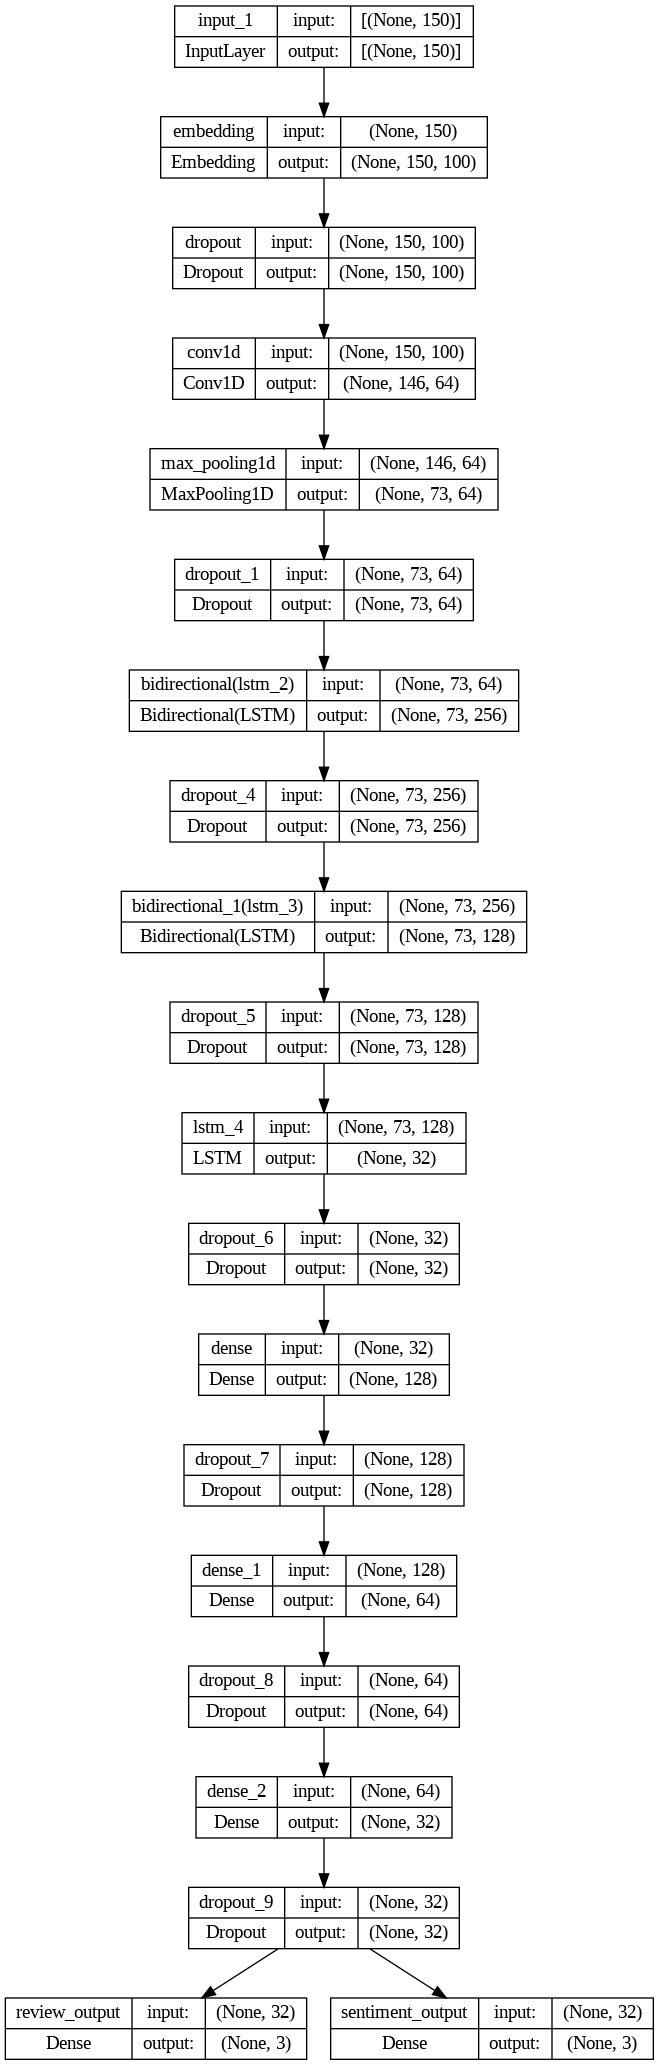

In [ ]:
from keras.utils import plot_model

# Visualize the model and save it to file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model with metrics for each output
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss={'review_output': 'sparse_categorical_crossentropy', 'sentiment_output': 'sparse_categorical_crossentropy'},
              metrics={'review_output': 'accuracy', 'sentiment_output': 'accuracy'})

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define Early Stopping and Model Checkpoint callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

In [ ]:
# # Train the model with callbacks
# history = model.fit(
#     X_train,
#     {'review_output': y_train_label, 'sentiment_output': y_train_sentiment},
#     epochs=36,
#     batch_size=32,
#     validation_split=0.2,
#     callbacks=[early_stopping, model_checkpoint]
#     # callbacks=[model_checkpoint]
# )

In [ ]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# Evaluate the model
results = model.evaluate(X_test, {'review_output': y_test_label, 'sentiment_output': y_test_sentiment})
print(f'Test results - Loss: {results[0]} - Review Output Loss: {results[1]} - Sentiment Output Loss: {results[2]}')

15/15 [==============================] - 6s 140ms/step - loss: 13.5432 - review_output_loss: 1.0990 - sentiment_output_loss: 1.0989 - review_output_accuracy: 0.2500 - sentiment_output_accuracy: 0.2937
Test results - Loss: 13.543160438537598 - Review Output Loss: 1.0990222692489624 - Sentiment Output Loss: 1.098884105682373


In [ ]:
# import matplotlib.pyplot as plt

# # Plot learning curve
# def plot_learning_curve(history):
#     plt.figure(figsize=(12, 6))

#     # Plot accuracy
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['review_output_accuracy'], label='Review Output Accuracy')
#     plt.plot(history.history['val_review_output_accuracy'], label='Validation Review Output Accuracy')
#     plt.plot(history.history['sentiment_output_accuracy'], label='Sentiment Output Accuracy')
#     plt.plot(history.history['val_sentiment_output_accuracy'], label='Validation Sentiment Output Accuracy')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     # Plot loss
#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

# # Plot learning curve
# plot_learning_curve(history)


In [ ]:

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Predict on the test set
# y_test_pred_review = np.argmax(model.predict(X_test)[0], axis=1)
# y_test_pred_sentiment = np.argmax(model.predict(X_test)[1], axis=1)

# # Convert labels back to original encoding
# y_test_true_review = y_test_label
# y_test_true_sentiment = y_test_sentiment

In [ ]:
# # Plot confusion matrix for review prediction
# cm_review = confusion_matrix(y_test_true_review, y_test_pred_review)
# disp_review = ConfusionMatrixDisplay(confusion_matrix=cm_review, display_labels=label_encoder_review.classes_)
# disp_review.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for Review Classification')
# plt.show()

In [ ]:
# print(classification_report(y_test_true_review, y_test_pred_review, digits = 4))

# print("Accuracy score: ", accuracy_score(y_test_true_review, y_test_pred_review) * 100, '%')

In [ ]:
# # Plot confusion matrix for sentiment prediction
# cm_sentiment = confusion_matrix(y_test_true_sentiment, y_test_pred_sentiment)
# disp_sentiment = ConfusionMatrixDisplay(confusion_matrix=cm_sentiment, display_labels=label_encoder_sentiment.classes_)
# disp_sentiment.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for Sentiment Classification')
# plt.show()

In [ ]:
# print(classification_report(y_test_true_sentiment, y_test_pred_sentiment, digits = 4))

# print("Accuracy score: ", accuracy_score(y_test_true_sentiment, y_test_pred_sentiment) * 100, '%')

## BERT

### Setup

In [ ]:
!pip install transformers tensorflow matplotlib

import numpy as np
import pandas as pd
import tensorflow as tf
from transformers import AutoTokenizer, TFBertModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:


# Encode labels
label_encoder_review = LabelEncoder()
label_encoder_sentiment = LabelEncoder()
df['label_encoded'] = label_encoder_review.fit_transform(df['label'])
df['sentiment_encoded'] = label_encoder_sentiment.fit_transform(df['sentimen'])

# Load pretrained tokenizer
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
tokenizer = AutoTokenizer.from_pretrained(pretrained_name)

# Tokenization and Padding
max_length = 128  # Choose an appropriate max length
tokenized_data = tokenizer(df['stem_reviews'].tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors="tf")

input_ids = tokenized_data['input_ids']
attention_masks = tokenized_data['attention_mask']
labels_review = tf.convert_to_tensor(df['label_encoded'].values, dtype=tf.int32)
labels_sentiment = tf.convert_to_tensor(df['sentiment_encoded'].values, dtype=tf.int32)

# Create TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids, 'attention_mask': attention_masks},
                                              {'output_1': labels_review, 'output_2': labels_sentiment}))

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset = dataset.take(train_size).batch(16)
val_dataset = dataset.skip(train_size).take(val_size).batch(16)


In [ ]:
# class MultiTaskModel(torch.nn.Module):
#     def __init__(self, pretrained_name):
#         super(MultiTaskModel, self).__init__()
#         self.bert = RobertaModel.from_pretrained(pretrained_name)
#         self.classifier_review = torch.nn.Linear(self.bert.config.hidden_size, 3)  # 3 classes for review
#         self.classifier_sentiment = torch.nn.Linear(self.bert.config.hidden_size, 3)  # 3 classes for sentiment

#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids, attention_mask=attention_mask)
#         pooled_output = outputs[1]
#         logits_review = self.classifier_review(pooled_output)
#         logits_sentiment = self.classifier_sentiment(pooled_output)
#         return logits_review, logits_sentiment

# model = MultiTaskModel(pretrained_name)


Some weights of RobertaModel were not initialized from the model checkpoint at w11wo/indonesian-roberta-base-sentiment-classifier and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class TFRobertaMultiTask(tf.keras.Model):
    def __init__(self, pretrained_name):
        super(TFRobertaMultiTask, self).__init__()
        self.bert = TFBertModel.from_pretrained(pretrained_name)
        self.classifier_review = tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for review
        self.classifier_sentiment = tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for sentiment

    def call(self, inputs):
        outputs = self.bert(inputs['input_ids'], attention_mask=inputs['attention_mask'])[0]
        logits_review = self.classifier_review(outputs[:, 0, :])  # Take [CLS] token
        logits_sentiment = self.classifier_sentiment(outputs[:, 0, :])  # Take [CLS] token
        return {'output_1': logits_review, 'output_2': logits_sentiment}

model = TFRobertaMultiTask(pretrained_name)

# Compile the model
losses = {
    "output_1": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    "output_2": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
}
metrics = {
    "output_1": tf.keras.metrics.SparseCategoricalAccuracy(),
    "output_2": tf.keras.metrics.SparseCategoricalAccuracy()
}
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), loss=losses, metrics=metrics)


You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['roberta.encoder.layer.9.output.LayerNorm.weight', 'roberta.encoder.layer.11.attention.self.query.weight', 'roberta.encoder.layer.6.intermediate.dense.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.11.attention.output.LayerNorm.bias', 'roberta.encoder.layer.7.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.self.value.bias', 'roberta.encoder.layer.11.attention.self.query.bias', 'roberta.embeddings.token_type_embeddings.weight', 'roberta.encoder.layer.4.attention.self.value.bias', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.5.attention.output.dense.bias', 'roberta.encoder.layer.0.attention.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.output.d

In [ ]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    batch_size=32,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
120/120 [==============================] - 2926s 24s/step - loss: 2.1172 - output_1_loss: 0.8919 - output_2_loss: 1.2253 - output_1_sparse_categorical_accuracy: 0.5984 - output_2_sparse_categorical_accuracy: 0.9224 - val_loss: 0.6132 - val_output_1_loss: 0.6132 - val_output_2_loss: 3.7824e-06 - val_output_1_sparse_categorical_accuracy: 0.7563 - val_output_2_sparse_categorical_accuracy: 1.0000
Epoch 2/10
 17/120 [===>..........................] - ETA: 38:12 - loss: 2.9010 - output_1_loss: 1.0546 - output_2_loss: 1.8463 - output_1_sparse_categorical_accuracy: 0.4301 - output_2_sparse_categorical_accuracy: 0.8235

KeyboardInterrupt: 

In [ ]:
# Training setup
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()
epochs = 10
early_stopping_patience = 3
best_val_loss = float('inf')
patience_counter = 0

train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        b_input_ids, b_attention_mask, b_labels_review, b_labels_sentiment = batch

        optimizer.zero_grad()

        logits_review, logits_sentiment = model(b_input_ids, attention_mask=b_attention_mask)

        loss_review = loss_fn(logits_review, b_labels_review)
        loss_sentiment = loss_fn(logits_sentiment, b_labels_sentiment)
        loss = loss_review + loss_sentiment

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0

    with torch.no_grad():
        for batch in val_dataloader:
            b_input_ids, b_attention_mask, b_labels_review, b_labels_sentiment = batch

            logits_review, logits_sentiment = model(b_input_ids, attention_mask=b_attention_mask)

            loss_review = loss_fn(logits_review, b_labels_review)
            loss_sentiment = loss_fn(logits_sentiment, b_labels_sentiment)
            loss = loss_review + loss_sentiment

            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f'Epoch {epoch + 1}/{epochs}')
    print(f'Training loss: {avg_train_loss:.4f}')
    print(f'Validation loss: {avg_val_loss:.4f}')

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        patience_counter += 1

    if patience_counter >= early_stopping_patience:
        print('Early stopping triggered')
        break

# Load best model
model.load_state_dict(torch.load('best_model.pt'))

# Plot learning curve
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


KeyboardInterrupt: 

### Train

# TEST RESULT

In [ ]:
# Function for prediction with percentage
def predict_review_with_percentage(model, tokenizer, review_text):
    sequence = tokenizer.texts_to_sequences([review_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)

    review_pred = label_encoder_review.inverse_transform(np.argmax(prediction[0], axis=1))[0]
    sentiment_pred = label_encoder_sentiment.inverse_transform(np.argmax(prediction[1], axis=1))[0]

    # Calculate percentage
    review_percentage = np.max(prediction[0]) * 100
    sentiment_percentage = np.max(prediction[1]) * 100

    return review_pred, review_percentage, sentiment_pred, sentiment_percentage



# Function to predict star rating based on sentiment percentage
def predict_star_rating(sentiment_percentage):
    if sentiment_percentage <= 20:
        return 1
    elif sentiment_percentage <= 40:
        return 2
    elif sentiment_percentage <= 60:
        return 3
    elif sentiment_percentage <= 80:
        return 4
    else:
        return 5




In [ ]:
# Example usage by user input
user_review = input("Masukkan review produk: ")
review_pred, review_percentage, sentiment_pred, sentiment_percentage = predict_review_with_percentage(model, tokenizer, user_review)

# Predict star rating based on sentiment percentage
star_rating = predict_star_rating(sentiment_percentage)
print(' ________________  Review Analysis Result ______________')
print(f'| Review : {review_pred} - Percentage: {review_percentage:.2f}%','                    |')
print(f'| Sentiment : {sentiment_pred} - Percentage: {sentiment_percentage:.2f}%','            |')
print(f'| Star Rating: {star_rating}','                                       |')
print(' -------------------------------------------------------')